In [ ]:
import sys
#!{sys.executable} -m pip install <package list>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import GridSearchCV

#tensorflow
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, DenseFeatures

In [ ]:
#Data Wrangling & Visualization

In [ ]:
# The dataset is already loaded below
data = pd.read_csv("/content/AB_NYC_2019.csv")

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Explore columns
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Description
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Description (Non numeric)
data.describe(exclude=np.number)

,name,host_name,last_review
count,48879,48874,38843
unique,47905,11452,1764
top,Hillside Hotel,Michael,2019-06-23
freq,18,417,1413


In [ ]:
#Based on the above data, it looks like the price and minimum nights data might have outliers
#And, it needs to be removed from the training dataset
# Refer steps 9 and 10

In [ ]:
data.info()
# there are some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Below is the missing count
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Visualization

In [ ]:
#1 room_type, neighborhood and neighborhood_group (discrete variables)

data.room_type.value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
data.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Rossville                1
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

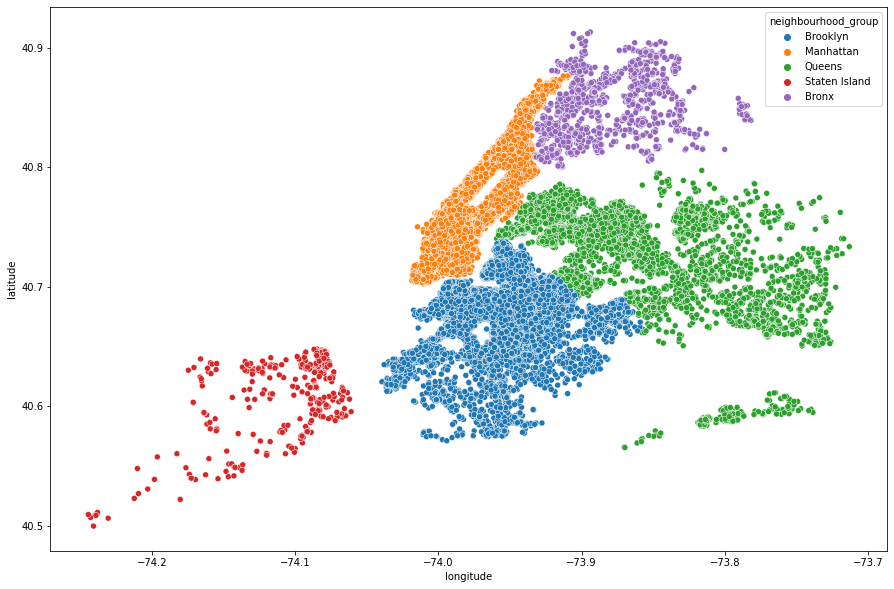

In [ ]:
plt.figure(figsize=(15,10))
sb.scatterplot(data=data, x=data.longitude, y=data.latitude, hue=data.neighbourhood_group)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

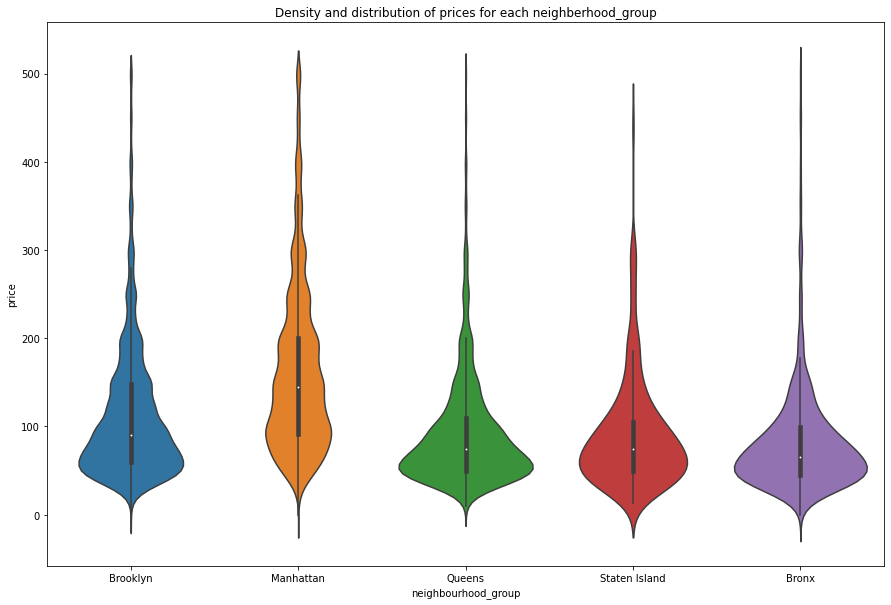

In [ ]:
#creating a sub-dataframe with no extreme values 
sub_ab1=data[data.price <= 500]
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(15,10))
viz_2=sb.violinplot(data=sub_ab1, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of minimum_nights for each neighberhood_group')

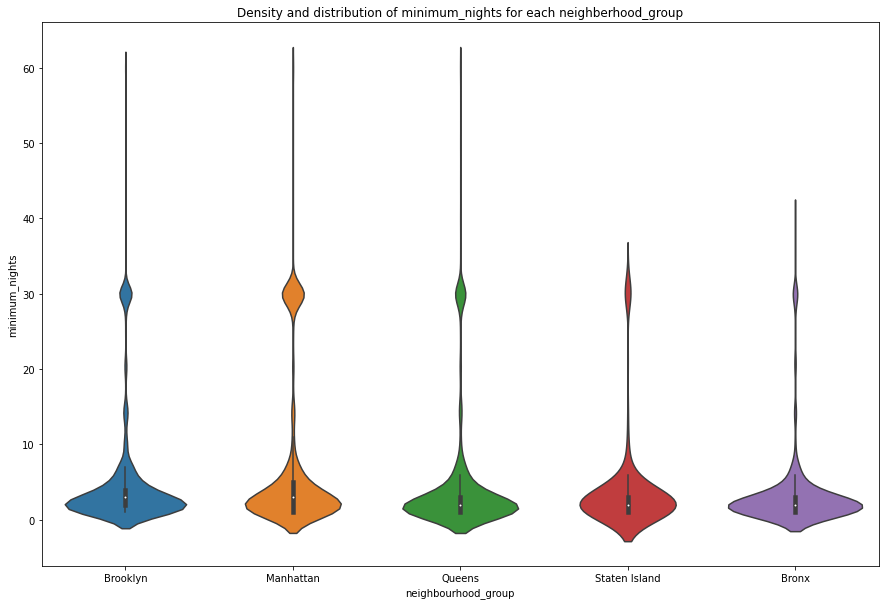

In [ ]:
#creating a sub-dataframe with no extreme values 
sub_ab2=data[data.minimum_nights <= 60]
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(15,10))
viz_3=sb.violinplot(data=sub_ab2, x='neighbourhood_group', y='minimum_nights')
viz_3.set_title('Density and distribution of minimum_nights for each neighberhood_group')

In [ ]:
#1 hot encoding is one of the technique for convert the categorical variables into numeric variables
#Per my learning, there two ways to implement

In [ ]:
#****** Follow EITHER option-1 or 2
#option-1

#1 neighbourhood_group 
data_ng = data["neighbourhood_group"]

dum_df1 = pd.get_dummies(data_ng, columns=["neighbourhood_group"], prefix="ng")
dum_df1.head(10)

#add these features into the main training df
data = data.join(dum_df1)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0


In [ ]:
#option-1

#2 room_type 
data_ng = data["room_type"]

dum_df2 = pd.get_dummies(data_ng, columns=["room_type"], prefix="roomtyp")
dum_df2.head(10)

#add these features into the main training df
data = data.join(dum_df2)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,roomtyp_Entire home/apt,roomtyp_Private room,roomtyp_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0


In [ ]:
#option -2 (using pd.factorize method)


data["neighbourhood_group"] = pd.factorize(data.neighbourhood_group)[0]
data["neighbourhood"] = pd.factorize(data.neighbourhood)[0]
data["room_type"] = pd.factorize(data.room_type)[0]

data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,0,0,40.64749,-73.97237,0,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,1,1,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,2,40.80902,-73.94190,0,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,0,3,40.68514,-73.95976,1,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,4,40.79851,-73.94399,1,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#split the train and test data
tr_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print("Training set count: ", len(tr_data))
print("Test set count: ",len(test_data))

Training set count:  39116
Test set count:  9779


In [ ]:
#Now, lets remove the outliers from traning set

tr_data = tr_data[tr_data.price <= 500]


In [ ]:
tr_data = tr_data[tr_data.price > 0]

In [ ]:
print("Training set count: ", len(tr_data))
#below count confirm that the outliers got removed

Training set count:  38258


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

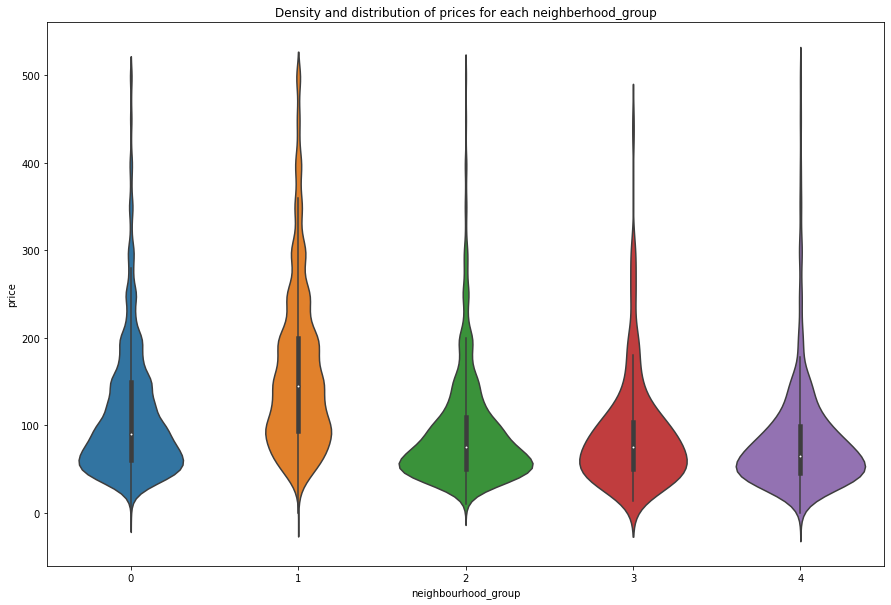

In [ ]:
#Now, plot the data again to showcase density and distribtuion of prices 
plt.figure(figsize=(15,10))
viz_3=sb.violinplot(data=tr_data, x='neighbourhood_group', y='price')
viz_3.set_title('Density and distribution of prices for each neighberhood_group')

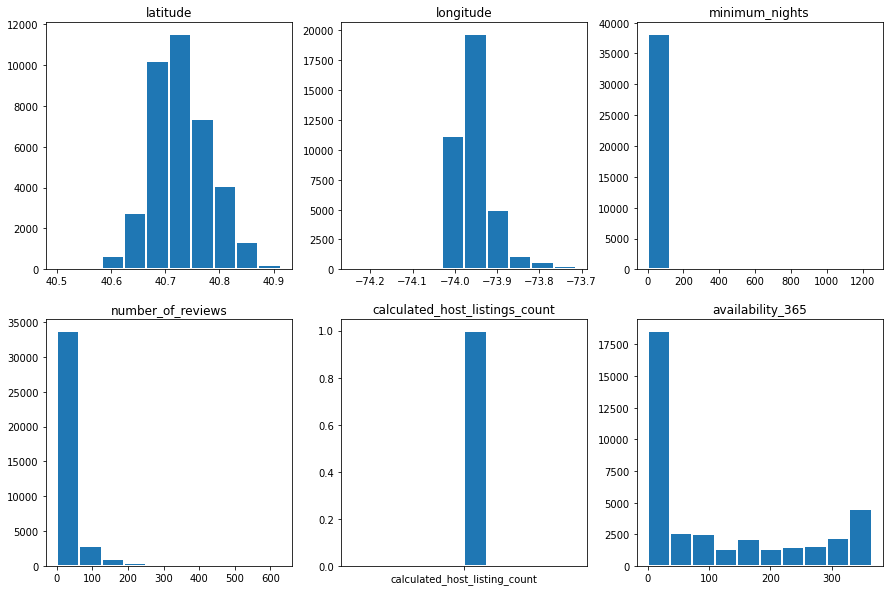

In [ ]:
#2 latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
#(continuous variables)

viz1, axes = plt.subplots(2,3)

axes[0,0].hist(x="latitude", data=tr_data, linewidth=2, edgecolor="white")
axes[0,0].set_title("latitude")
axes[0,1].hist(x="longitude", data=tr_data, linewidth=2, edgecolor="white")
axes[0,1].set_title("longitude")
axes[0,2].hist(x="minimum_nights", data=tr_data, linewidth=2, edgecolor="white")
axes[0,2].set_title("minimum_nights")
axes[1,0].hist(x="number_of_reviews", data=tr_data, linewidth=2, edgecolor="white")
axes[1,0].set_title("number_of_reviews")
axes[1,1].hist(x="calculated_host_listing_count", data=tr_data, linewidth=2, edgecolor="white")
axes[1,1].set_title("calculated_host_listings_count")
axes[1,2].hist(x="availability_365", data=tr_data, linewidth=2, edgecolor="white")
axes[1,2].set_title("availability_365")

viz1.set_size_inches(15,10)

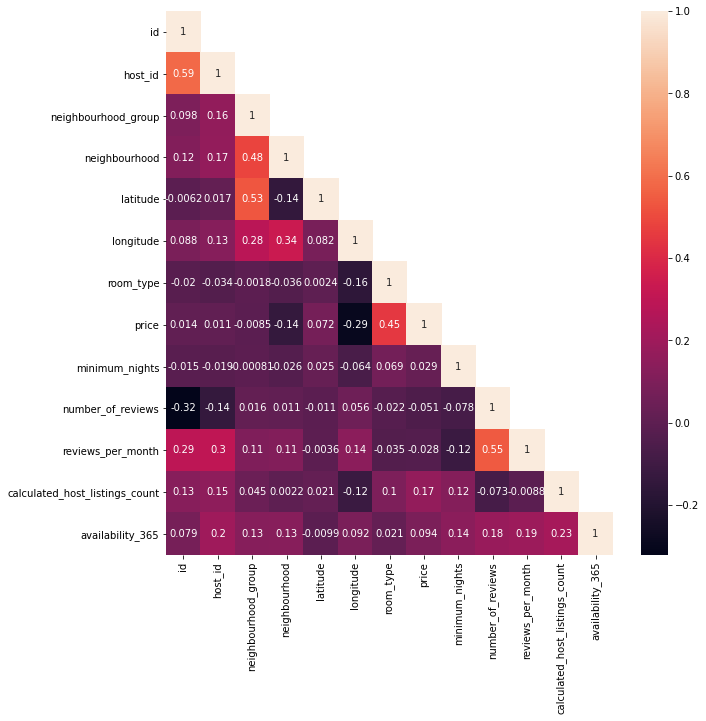

In [ ]:
#Corelation Matrix
#1 visualize in a heatmap

tr_cor_mat=tr_data.corr()

tr_mask=np.array(tr_cor_mat)
tr_mask[np.tril_indices_from(tr_mask)] = False

viz2=plt.gcf()
viz2.set_size_inches(10,10)

sb.heatmap(data=tr_cor_mat, mask=tr_mask, annot=True)

In [ ]:
#Corelation Matrix
#2 Looks at the values

tr_cor_mat["price"].sort_values(ascending=False)

price                             1.000000
room_type                         0.448901
calculated_host_listings_count    0.165915
availability_365                  0.093585
latitude                          0.072430
minimum_nights                    0.029258
id                                0.013932
host_id                           0.011012
neighbourhood_group              -0.008486
reviews_per_month                -0.027504
number_of_reviews                -0.050747
neighbourhood                    -0.137211
longitude                        -0.291274
Name: price, dtype: float64

In [ ]:
tr_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32645,25674366,Mid Century Modern Williamsburg Condo,9038810,Sanjay,0,12,40.71577,-73.95530,1,295,3,11,2019-05-16,0.87,1,1
23615,19100971,Spacious Bedroom with lots of Natural Light,81745867,Jacqueline,1,30,40.84917,-73.94048,0,70,2,2,2018-06-25,0.16,1,0
31183,24209867,Spacious Room in Clinton Hill/Bed-Stuy,1218837,Diana,0,6,40.68993,-73.95947,0,58,2,0,NaN,NaN,2,0
29260,22451798,Historic Bed Stuy Charmer! Entire Apartment!,4126686,Michael,0,6,40.68427,-73.93118,1,75,3,87,2019-07-05,4.91,1,267
7275,5344850,Cozy room 15 min from Manhattan,27698133,Jakub,2,31,40.74705,-73.89564,0,38,5,13,2018-12-18,0.25,1,0


In [ ]:
#Based on the learning from analyticsvidhya blog:

#In order for the longitude and latitude to be correlated, we have to create a feature cross. 
#we will split the longitude*langitude map into a grid; TensorFlow makes it easy

#longitude
min_long=tr_data["longitude"].min()
max_long=tr_data["longitude"].max()

diff_long = max_long - min_long 
diff_long = diff_long/100

long_boundary=[]

for i in np.arange(min_long,max_long, diff_long):
  long_boundary.append(min_long+i*diff_long)

In [ ]:
#latitude
min_lat=tr_data["latitude"].min()
max_lat=tr_data["latitude"].max()

diff_lat = max_lat - min_lat 
diff_lat = diff_lat/100

lat_boundary=[]

for i in np.arange(min_lat,max_lat, diff_lat):
  lat_boundary.append(min_lat+i*diff_lat)

In [ ]:
print(long_boundary)

[-74.63623316501, -74.63620508984805, -74.63617701468608, -74.63614893952412, -74.63612086436217, -74.6360927892002, -74.63606471403824, -74.63603663887628, -74.63600856371433, -74.63598048855236, -74.6359524133904, -74.63592433822845, -74.63589626306648, -74.63586818790452, -74.63584011274256, -74.6358120375806, -74.63578396241864, -74.63575588725668, -74.63572781209473, -74.63569973693276, -74.6356716617708, -74.63564358660885, -74.63561551144689, -74.63558743628492, -74.63555936112296, -74.63553128596101, -74.63550321079904, -74.63547513563708, -74.63544706047513, -74.63541898531317, -74.6353909101512, -74.63536283498924, -74.63533475982729, -74.63530668466532, -74.63527860950336, -74.63525053434141, -74.63522245917945, -74.63519438401748, -74.63516630885552, -74.63513823369357, -74.6351101585316, -74.63508208336964, -74.63505400820769, -74.63502593304572, -74.63499785788376, -74.6349697827218, -74.63494170755985, -74.63491363239788, -74.63488555723592, -74.63485748207397, -74.63482

In [ ]:
print(lat_boundary)

[40.667163482133, 40.66718056134229, 40.66719764055158, 40.66721471976087, 40.667231798970164, 40.66724887817945, 40.66726595738874, 40.66728303659803, 40.66730011580732, 40.66731719501661, 40.6673342742259, 40.66735135343519, 40.66736843264448, 40.66738551185377, 40.66740259106306, 40.66741967027235, 40.66743674948164, 40.66745382869093, 40.66747090790022, 40.66748798710951, 40.6675050663188, 40.66752214552809, 40.66753922473738, 40.66755630394667, 40.66757338315596, 40.66759046236525, 40.66760754157454, 40.66762462078383, 40.66764169999312, 40.66765877920241, 40.6676758584117, 40.66769293762099, 40.66771001683028, 40.66772709603957, 40.66774417524886, 40.66776125445815, 40.66777833366744, 40.66779541287673, 40.66781249208602, 40.66782957129531, 40.6678466505046, 40.66786372971389, 40.66788080892318, 40.66789788813247, 40.66791496734176, 40.66793204655105, 40.66794912576034, 40.66796620496963, 40.66798328417892, 40.66800036338821, 40.6680174425975, 40.66803452180679, 40.66805160101608

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column

long_marked = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('longitude'), boundaries=long_boundary
)

lat_marked = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('latitude'), boundaries=lat_boundary
)

crossed_feature = tf.feature_column.crossed_column([long_marked,lat_marked],hash_bucket_size=100)
feature_layer = tf.keras.layers.DenseFeatures(tf.feature_column.indicator_column(crossed_feature))



In [ ]:
print(crossed_feature)

CrossedColumn(keys=(BucketizedColumn(source_column=NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-74.63623316501, -74.63620508984805, -74.63617701468608, -74.63614893952412, -74.63612086436217, -74.6360927892002, -74.63606471403824, -74.63603663887628, -74.63600856371433, -74.63598048855236, -74.6359524133904, -74.63592433822845, -74.63589626306648, -74.63586818790452, -74.63584011274256, -74.6358120375806, -74.63578396241864, -74.63575588725668, -74.63572781209473, -74.63569973693276, -74.6356716617708, -74.63564358660885, -74.63561551144689, -74.63558743628492, -74.63555936112296, -74.63553128596101, -74.63550321079904, -74.63547513563708, -74.63544706047513, -74.63541898531317, -74.6353909101512, -74.63536283498924, -74.63533475982729, -74.63530668466532, -74.63527860950336, -74.63525053434141, -74.63522245917945, -74.63519438401748, -74.63516630885552, -74.63513823369357, -74.6351101585316, -74.63508208336964, -74.

In [ ]:
tr_data.columns.to_series().groupby(tr_data.dtypes).groups

{int64: ['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], float64: ['latitude', 'longitude', 'reviews_per_month'], object: ['name', 'host_name', 'last_review']}

In [ ]:
#drop the columns other than numeric
tr_data.drop(columns=['name', 'host_name', 'last_review','reviews_per_month'], axis=1, inplace=True)

In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38267 entries, 32645 to 15795
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38267 non-null  int64  
 1   host_id                         38267 non-null  int64  
 2   neighbourhood_group             38267 non-null  int64  
 3   neighbourhood                   38267 non-null  int64  
 4   latitude                        38267 non-null  float64
 5   longitude                       38267 non-null  float64
 6   room_type                       38267 non-null  int64  
 7   price                           38267 non-null  int64  
 8   minimum_nights                  38267 non-null  int64  
 9   number_of_reviews               38267 non-null  int64  
 10  calculated_host_listings_count  38267 non-null  int64  
 11  availability_365                38267 non-null  int64  
dtypes: float64(2), int64(10)
mem

In [ ]:
tr_data.isnull().sum()
#reviews_per_month                 8106
#Probably, there is no reviews; so this can be replaced with 0

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38267 entries, 32645 to 15795
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38267 non-null  int64  
 1   host_id                         38267 non-null  int64  
 2   neighbourhood_group             38267 non-null  int64  
 3   neighbourhood                   38267 non-null  int64  
 4   latitude                        38267 non-null  float64
 5   longitude                       38267 non-null  float64
 6   room_type                       38267 non-null  int64  
 7   price                           38267 non-null  int64  
 8   minimum_nights                  38267 non-null  int64  
 9   number_of_reviews               38267 non-null  int64  
 10  calculated_host_listings_count  38267 non-null  int64  
 11  availability_365                38267 non-null  int64  
dtypes: float64(2), int64(10)
mem

In [ ]:
#set 25% as test size
x_train, x_test, y_train, y_test = train_test_split(tr_data.drop('price', axis=1), tr_data['price'], test_size=0.25, random_state=42)

In [ ]:
print("price min :", y_test.min())
print("price min :", y_test.max())
print("price mean :", y_test.mean())

price min : 10
price min : 500
price mean : 131.56518557239937


In [ ]:
#pick some models for accuracy check based on MAE (Mean Absolute Error)
#Picked the below models for compare the accuracy

lmodels=[RandomForestRegressor(), LinearRegression(), KNeighborsRegressor(), SVR()]
lmodel_names=['RandomForestRegressor', 'LinearRegression', 'KNeighborsRegressor','SVR']

mae=[]
mape=[]
out={}

for model in range(len(lmodels)):
    sel = lmodels[model]
    sel.fit(x_train, y_train)
    test_pred = sel.predict(x_test)
    mae.append(mean_absolute_error(y_test, test_pred))
    mape.append(np.mean(np.abs((y_test-test_pred)/y_test ))* 100)

out_modelsel={'model':lmodel_names,'mae': mae, 'mape':mape}
out_modelsel

{'mae': [40.73232096184004,
  51.40383747183732,
  67.92018818609513,
  63.48353983867608],
 'mape': [34.795958409823555,
  53.11065683960816,
  71.56632014991939,
  56.39984193672974],
 'model': ['RandomForestRegressor',
  'LinearRegression',
  'KNeighborsRegressor',
  'SVR']}

In [ ]:
print(test_pred)

[115.06614104  98.27433719 118.90203274 ... 107.05900358 120.42441128
 101.77911107]
